<a href="https://colab.research.google.com/github/jungry/time_series/blob/main/TimeSeriesPractice2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Google Mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Decomposing Apple's stock time series data

In [2]:
pip install yfinance

In [3]:
import pandas as pd
import yfinance as yf

# Specify a start and end date
start_date = '2020-01-01'
end_date = '2024-04-24'

# Import data for Apple stock
aapl = yf.download('AAPL', start=start_date, end=end_date)

# Output the result
aapl.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2020-01-02 00:00:00+00:00,72.876106,75.087502,75.150002,73.797501,74.059998,135480400
2020-01-03 00:00:00+00:00,72.167610,74.357498,75.144997,74.125000,74.287498,146322800
2020-01-06 00:00:00+00:00,72.742661,74.949997,74.989998,73.187500,73.447502,118387200
2020-01-07 00:00:00+00:00,72.400543,74.597504,75.224998,74.370003,74.959999,108872000
2020-01-08 00:00:00+00:00,73.565201,75.797501,76.110001,74.290001,74.290001,132079200


In [4]:
aapl.reset_index(inplace=True)
aapl=aapl[['Date','Open']]

## Visualize raw Apple's stock time series data

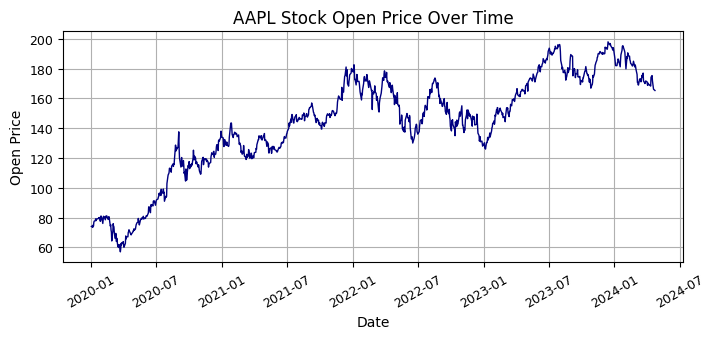

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 3))

plt.plot(aapl['Date'], aapl['Open'], color='navy', linewidth=1)

plt.title('AAPL Stock Open Price Over Time')
plt.xlabel('Date')
plt.ylabel('Open Price')

plt.xticks(rotation=30,fontsize=9)
plt.yticks(fontsize=9)

plt.grid(True)

# The trend appears to be upward, but seasonality and irregularities are hard to tell from the raw data.
# Time series decomposition can help us understand this.

### The trend appears to be upward, but seasonality and residual are hard to tell from the raw data. Time series decomposition can help us understand this.

## Decompose raw Apple's stock time series data

### Description for seasonal_decompose of statsmodels.tsa.seasonal  


        result=seasonal_decompose(data,
                          model = 'additive' or 'multiplicative',
                          filt = None,
                          period = None,
                          two_sided = True or False,
                          extrapolate_trend = True or False,
                          freq : '',
                          weighted : True or False
                          )

data: The time series dataset to be decomposed, typically using Pandas Series or DataFrame.

model: Specify the decomposition model (Additive vs. Multiplicative Models).


<div style="width: 100%;">

|                      | Applicative Model                                             | Multiplicative Model                                                 |
|----------------------|---------------------------------------------------------------|---------------------------------------------------------------------|
| **Model**            | $\hat{y}(t) = \text{Level} + \text{Trend} + \text{Seasonality} + \text{Noise}$          | $\hat{y}(t) = \text{Level} \times \text{Trend} \times \text{Seasonality} \times \text{Noise}$   |
| **Level**             | Changes over time are constant                                    | Takes forms like quadratic or exponential,<br>with changes increasing or decreasing over time    |
| **Trend**            | Linear upward/downward trend                                         | Non-linear (curved) upward/downward trend                                    |
| **Seasonality**      | Frequency and amplitude are constant                  | Frequency and amplitude increase or decrease                |

</div>

filt: filter used for trend estimation, default is None (moving average) (alternatively, 'hp', 'convolution').

period: specify the length of the seasonality period, automatically calculated if set to None.

two_sided: if True, two-sided filtering is applied for decomposition, if False, one-sided filtering is applied (default is True).

extrapolate_trend: if True, the trend is estimated outside the range (default is False).

freq: specify the frequency of the time series data, automatically calculated if set to None. (Replaced by 'period' in new version)

weighted: if True, weights are applied and used in regression analysis (default is False).



In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

# One more preprocessing below because date_time should go to index
aapl.set_index('Date',drop=True,inplace=True)

'''
Date: 'Date' 열을 인덱스로 설정합니다.
drop=True: 'Date' 열을 인덱스로 설정한 후, 기존의 'Date' 열은 데이터 프레임에서 삭제합니다.
inplace=True: 데이터 프레임을 직접 수정하여 새로운 객체를 생성하지 않도록 합니다.
'''

result = seasonal_decompose(aapl, model='additive', period=365)

'''
aapl: 분해할 시계열 데이터 프레임입니다.
model='additive': 가법 모델을 사용하여 데이터를 분해합니다. 이는 데이터의 변화가 일정하다는 가정을 기반으로 합니다.
period=365: 계절성 주기를 365로 설정합니다. 이는 연간 주기를 의미하며, 일반적으로 연간 데이터에 대해 사용됩니다.

결과: 이 함수는 시계열 데이터를 추세(Trend), 계절성(Seasonality), 잔여(Residual) 성분으로 분해한 결과를 result에 저장합니다. 이 결과는 이후에 각 성분을 시각화하거나 분석하는 데 사용될 수 있습니다.
'''



"\naapl: 분해할 시계열 데이터 프레임입니다.\nmodel='additive': 가법 모델을 사용하여 데이터를 분해합니다. 이는 데이터의 변화가 일정하다는 가정을 기반으로 합니다.\nperiod=365: 계절성 주기를 365로 설정합니다. 이는 연간 주기를 의미하며, 일반적으로 연간 데이터에 대해 사용됩니다.\n\n결과: 이 함수는 시계열 데이터를 추세(Trend), 계절성(Seasonality), 잔여(Residual) 성분으로 분해한 결과를 result에 저장합니다. 이 결과는 이후에 각 성분을 시각화하거나 분석하는 데 사용될 수 있습니다.\n"

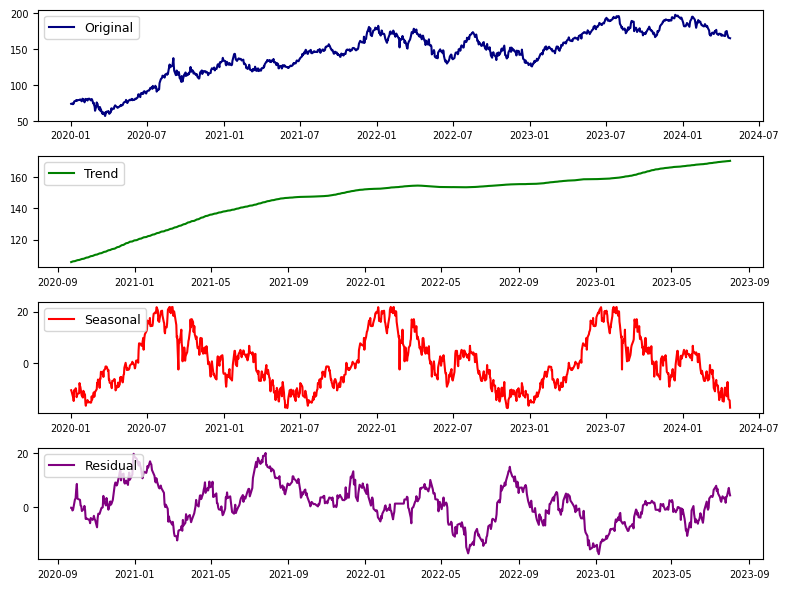

In [7]:
# Visualise results
plt.figure(figsize=(8, 6))

# Plot original data
plt.subplot(4, 1, 1)
plt.plot(aapl, label='Original', color='navy')
plt.legend(loc='upper left',fontsize=9)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

# Trend plots
plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend', color='green')
plt.legend(loc='upper left',fontsize=9)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

# Seasonality plots
plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal', color='red')
plt.legend(loc='upper left',fontsize=9)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

# Residuals Plot
plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual', color='purple')
plt.legend(loc='upper left',fontsize=9)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

plt.tight_layout()
plt.show()

###   
Through decomposition, the Trend, Seasonal, and Residual components are clearly visible. As expected, the Trend is upward, and it shows seasonality with a cycle of approximately one and a half years.


But, looking above, you can see that the x-axis range is different for each graph.
The reason why the x-axis range is different for each function is that the **'seasonal_decompose' function** includes missing values (NaNs) at the beginning and end of each component (trend, seasonal, residual) during the process of calculating the moving average of the data. **This occurs because sufficient data points are needed to calculate the moving average.** Therefore, while the original and seasonal data cover the entire period, the trend and residual data only cover a partial period, resulting in different x-axis ranges.

In [9]:
# Sort all components by removing missing values
original = aapl.dropna()
trend = result.trend.dropna()
seasonal = result.seasonal.dropna()
resid = result.resid.dropna()
# Calculating a common index
common_index = original.index.intersection(trend.index).intersection(seasonal.index).intersection(resid.index)

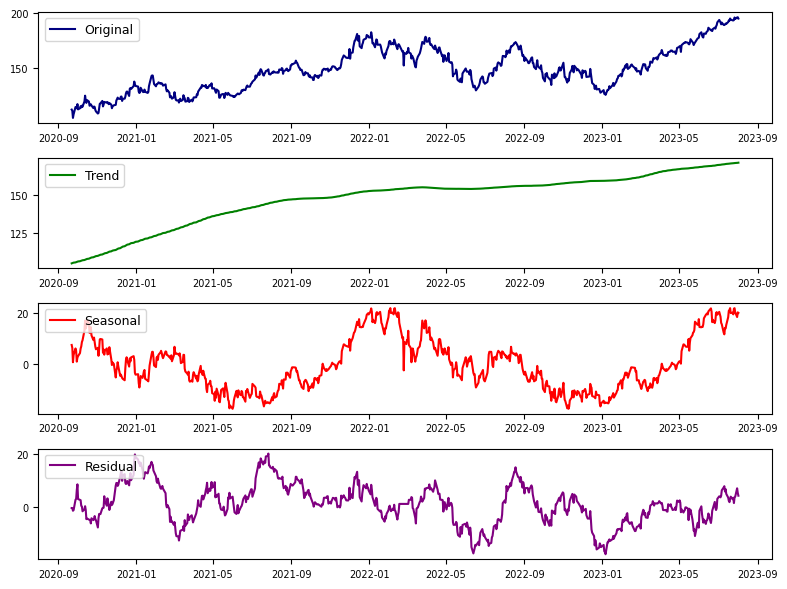

In [10]:
# Synchronised plots
plt.figure(figsize=(8, 6))

# Plot original data
plt.subplot(4, 1, 1)
plt.plot(original.loc[common_index], label='Original', color='navy')
plt.legend(loc='upper left', fontsize=9)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

# Trend plots
plt.subplot(4, 1, 2)
plt.plot(trend[common_index], label='Trend', color='green')
plt.legend(loc='upper left', fontsize=9)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

# Seasonality plots
plt.subplot(4, 1, 3)
plt.plot(seasonal[common_index], label='Seasonal', color='red')
plt.legend(loc='upper left', fontsize=9)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

# Residuals Plot
plt.subplot(4, 1, 4)
plt.plot(resid[common_index], label='Residual', color='purple')
plt.legend(loc='upper left', fontsize=9)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

plt.tight_layout()
plt.show()

# Trend Analysis Using Australian Visitor Data

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

from scipy.stats import t

In [12]:
df = pd.read_csv('/content/drive/Shared drives/timeseries-datasets/australia_visitor.csv')

df.head()

,visitors
0,0.829894
1,0.859511
2,0.876689
3,0.866707
4,0.932052


In [13]:
start_date = '1980-01-01'
end_date = '2015-12-31'

df.index = pd.date_range(start_date,end_date,freq='y')

df.head()

<ipython-input-13-a506db4fec08>:4: FutureWarning: 'y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df.index = pd.date_range(start_date,end_date,freq='y')


,visitors
1980-12-31,0.829894
1981-12-31,0.859511
1982-12-31,0.876689
1983-12-31,0.866707
1984-12-31,0.932052


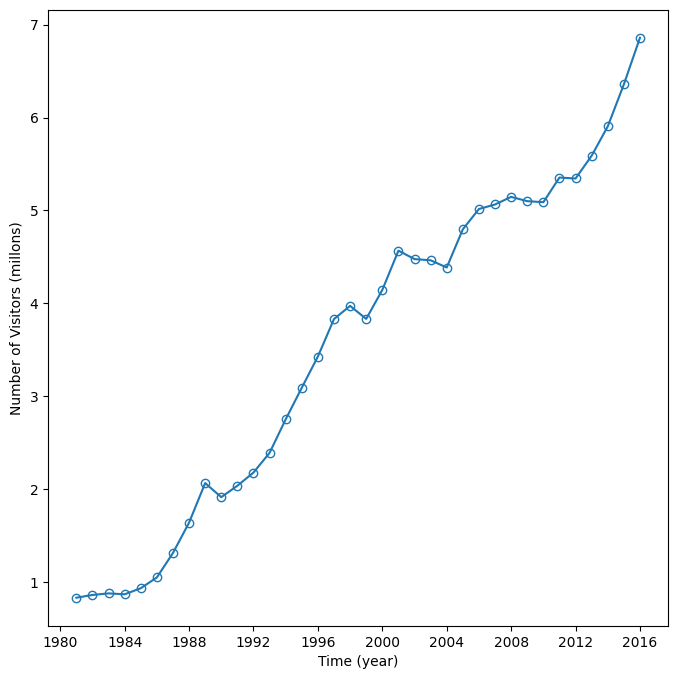

In [15]:
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
plt.plot(df['visitors'],marker='o',markerfacecolor='none')
plt.ylabel('Number of Visitors (millons)')
plt.xlabel('Time (year)')
plt.show()

In [14]:
df['time'] = range(1,len(df)+1) ## make time variable
y = df['visitors']
X = df['time']
X = sm.add_constant(X)

In [16]:
print(X)

            const  time
1980-12-31    1.0     1
1981-12-31    1.0     2
1982-12-31    1.0     3
1983-12-31    1.0     4
1984-12-31    1.0     5
1985-12-31    1.0     6
1986-12-31    1.0     7
1987-12-31    1.0     8
1988-12-31    1.0     9
1989-12-31    1.0    10
1990-12-31    1.0    11
1991-12-31    1.0    12
1992-12-31    1.0    13
1993-12-31    1.0    14
1994-12-31    1.0    15
1995-12-31    1.0    16
1996-12-31    1.0    17
1997-12-31    1.0    18
1998-12-31    1.0    19
1999-12-31    1.0    20
2000-12-31    1.0    21
2001-12-31    1.0    22
2002-12-31    1.0    23
2003-12-31    1.0    24
2004-12-31    1.0    25
2005-12-31    1.0    26
2006-12-31    1.0    27
2007-12-31    1.0    28
2008-12-31    1.0    29
2009-12-31    1.0    30
2010-12-31    1.0    31
2011-12-31    1.0    32
2012-12-31    1.0    33
2013-12-31    1.0    34
2014-12-31    1.0    35
2015-12-31    1.0    36


In [28]:
print(y)

1980-12-31    0.829894
1981-12-31    0.859511
1982-12-31    0.876689
1983-12-31    0.866707
1984-12-31    0.932052
1985-12-31    1.048264
1986-12-31    1.311193
1987-12-31    1.637562
1988-12-31    2.064107
1989-12-31    1.912683
1990-12-31    2.035446
1991-12-31    2.177211
1992-12-31    2.389683
1993-12-31    2.750592
1994-12-31    3.090666
1995-12-31    3.426640
1996-12-31    3.830649
1997-12-31    3.971909
1998-12-31    3.831600
1999-12-31    4.143101
2000-12-31    4.566551
2001-12-31    4.475410
2002-12-31    4.462796
2003-12-31    4.384829
2004-12-31    4.796861
2005-12-31    5.015049
2006-12-31    5.063435
2007-12-31    5.145489
2008-12-31    5.099436
2009-12-31    5.088166
2010-12-31    5.353702
2011-12-31    5.343327
2012-12-31    5.589162
2013-12-31    5.904884
2014-12-31    6.357183
2015-12-31    6.858953
Freq: YE-DEC, Name: visitors, dtype: float64


## Linear trend model b_0 + b_1*x

### 1. Manual calculation method

In [17]:
time = df['time']
mean_t = time.mean()
mean_y = y.mean()
b1 = np.sum((y-mean_y)*(time-mean_t))/np.sum(np.square(time-mean_t))
b0 = mean_y-b1*mean_t

print("The value of b1 is "+str(b1))
print("The value of b0 is "+str(b0))


The value of b1 is 0.16936683979407977
The value of b0 is 0.40814108047619113


### 2. Using the OLS (ordinary least squares) function in statsmodels

In [18]:
ols_fit = sm.OLS(y,X).fit()
b1 = ols_fit.params.time
b0 = ols_fit.params.const

In [20]:
print("The value of b1 is "+str(b1))
print("The value of b0 is "+str(b0))

The value of b1 is 0.1693668397940798
The value of b0 is 0.40814108047618997


### Use a linear regression model to predict a future value and calculate a confidence interval

In [19]:
# The future time value to predict
future = [1,2,3,4,5]
n = len(df)

# Significance Level => Confidence intervals 95%
alpha = 0.05

# Calculate the inverse of the independent variable X
# To calculate confidence intervals, we need the variance of the predicted value, which requires the variance of the independent variable
X_tX_inv = np.linalg.inv(X.T.dot(X))

# Size of the error term for a given confidence interval in a t-distribution
t_val = t.ppf(1-alpha/2,df=n-2)

predict_vals = []
upper_limit = []
lower_limit = []
for l in future:
    predict_val = b0+b1*(n+l)

    # Measure the variability of prediction error => needed to calculate confidence intervals(limit)
    s2 = np.sum(np.square(y-b0-b1*time))/(n-2)
    x = np.array([[1],[n+l]])
    variance_factor = np.sqrt(1+x.T.dot(X_tX_inv.dot(x)))
    limit = t_val*np.sqrt(s2)*variance_factor[0][0]
    predict_vals.append(predict_val)
    upper_limit.append(predict_val+limit)
    lower_limit.append(predict_val-limit)

### Merge predictions for future points in time into a Dataframe using predict_vals, upper_limit, and lower_limit values

In [21]:
start_date = '2016-01-01'

pred_data = {
    'pred':predict_vals,
    'ul':upper_limit,
    'll':lower_limit
}
pred_df = pd.DataFrame(pred_data)
pred_df.index = pd.date_range(start_date,periods=future[-1],freq='Y')

fitted_val = b0+b1*time
vals = pd.concat([fitted_val,pred_df['pred']])

<ipython-input-21-b2519f7239f0>:9: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  pred_df.index = pd.date_range(start_date,periods=future[-1],freq='Y')


### Visualize predicted values and confidence interval for values

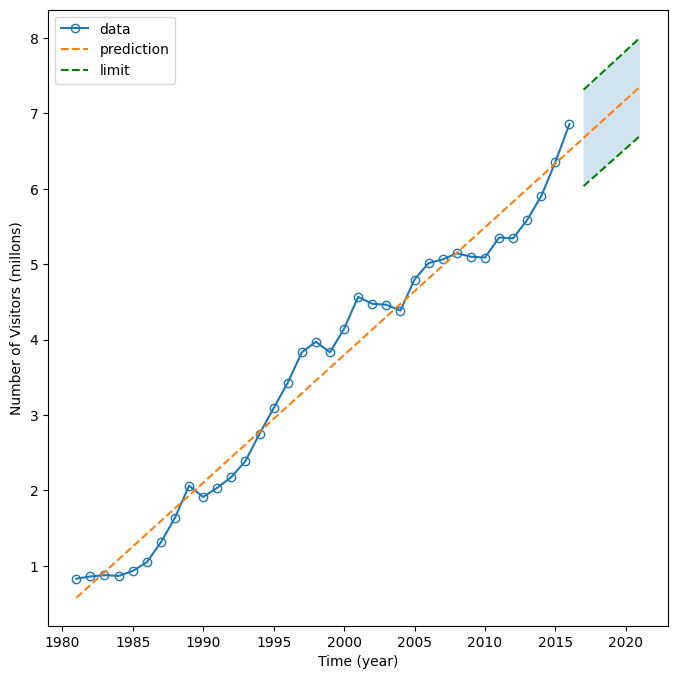

In [22]:
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')

marker_config = dict()
marker_config['marker'] = 'o'
marker_config['markerfacecolor'] = 'none'
plt.plot(df['visitors'],label='data',**marker_config)
plt.plot(vals,label='prediction',linestyle='--')

plt.plot(pred_df['ll'],color='green',linestyle='--',label='limit')
plt.plot(pred_df['ul'],color='green',linestyle='--')
plt.fill_between(pred_df.index,pred_df['ll'],pred_df['ul'],alpha=0.2)
plt.legend(loc='upper left')
plt.ylabel('Number of Visitors (millons)')
plt.xlabel('Time (year)')
plt.show()

## Quadratic trend model

In [23]:
df = pd.read_csv('/content/drive/Shared drives/timeseries-datasets/australia_visitor.csv')
start_date = '1980-01-01'
end_date = '2015-12-31'

df.index = pd.date_range(start_date,end_date,freq='y')
df['time'] = range(1,len(df)+1) ## make time variable

# Quadratic trend model
df['time_squared'] = df['time'] ** 2

# Define the quadratic model
y = df['visitors']
X_quad = df[['time', 'time_squared']]
X_quad = sm.add_constant(X_quad)

# Fit the quadratic model
quad_fit = sm.OLS(y, X_quad).fit()
b0_quad = quad_fit.params.const
b1_quad = quad_fit.params.time
b2_quad = quad_fit.params.time_squared

# Print coefficients
print("The value of b0 for the quadratic model is " + str(b0_quad))
print("The value of b1 for the quadratic model is " + str(b1_quad))
print("The value of b2 for the quadratic model is " + str(b2_quad))

The value of b0 for the quadratic model is 0.15615306058822753
The value of b1 for the quadratic model is 0.20915442188165256
The value of b2 for the quadratic model is -0.001075340056420861


<ipython-input-23-09d09bcd5998>:5: FutureWarning: 'y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df.index = pd.date_range(start_date,end_date,freq='y')


In [24]:
print(X_quad)

            const  time  time_squared
1980-12-31    1.0     1             1
1981-12-31    1.0     2             4
1982-12-31    1.0     3             9
1983-12-31    1.0     4            16
1984-12-31    1.0     5            25
1985-12-31    1.0     6            36
1986-12-31    1.0     7            49
1987-12-31    1.0     8            64
1988-12-31    1.0     9            81
1989-12-31    1.0    10           100
1990-12-31    1.0    11           121
1991-12-31    1.0    12           144
1992-12-31    1.0    13           169
1993-12-31    1.0    14           196
1994-12-31    1.0    15           225
1995-12-31    1.0    16           256
1996-12-31    1.0    17           289
1997-12-31    1.0    18           324
1998-12-31    1.0    19           361
1999-12-31    1.0    20           400
2000-12-31    1.0    21           441
2001-12-31    1.0    22           484
2002-12-31    1.0    23           529
2003-12-31    1.0    24           576
2004-12-31    1.0    25           625
2005-12-31  

<ipython-input-25-579d88974656>:26: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  pred_df_quad.index = pd.date_range(start_date, periods=future[-1], freq='Y')


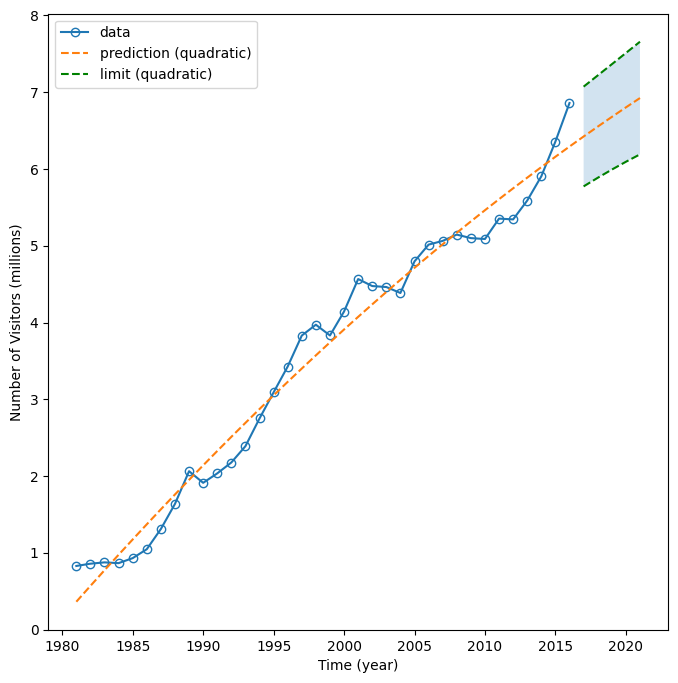

In [25]:
# Prediction for future values using the quadratic model
future = [1, 2, 3, 4, 5]
predict_vals_quad = []
upper_limit_quad = []
lower_limit_quad = []

# calculate a confidence interval
for l in future:
    predict_val_quad = b0_quad + b1_quad * (n + l) + b2_quad * (n + l) ** 2
    s2_quad = np.sum(np.square(y - b0_quad - b1_quad * time - b2_quad * time ** 2)) / (n - 3)
    x_quad = np.array([[1], [n + l], [(n + l) ** 2]])
    variance_factor_quad = np.sqrt(1 + x_quad.T.dot(np.linalg.inv(X_quad.T.dot(X_quad)).dot(x_quad)))
    limit_quad = t.ppf(1 - alpha / 2, df=n - 3) * np.sqrt(s2_quad) * variance_factor_quad[0][0]
    predict_vals_quad.append(predict_val_quad)
    upper_limit_quad.append(predict_val_quad + limit_quad)
    lower_limit_quad.append(predict_val_quad - limit_quad)

start_date = '2016-01-01'

pred_data_quad = {
    'pred': predict_vals_quad,
    'ul': upper_limit_quad,
    'll': lower_limit_quad
}
pred_df_quad = pd.DataFrame(pred_data_quad)
pred_df_quad.index = pd.date_range(start_date, periods=future[-1], freq='Y')

fitted_val_quad = b0_quad + b1_quad * time + b2_quad * time ** 2
vals_quad = pd.concat([fitted_val_quad, pred_df_quad['pred']])

# Plot the quadratic model predictions
fig = plt.figure(figsize=(8, 8))
fig.set_facecolor('white')

marker_config = dict()
marker_config['marker'] = 'o'
marker_config['markerfacecolor'] = 'none'
plt.plot(df['visitors'], label='data', **marker_config)
plt.plot(vals_quad, label='prediction (quadratic)', linestyle='--')

plt.plot(pred_df_quad['ll'], color='green', linestyle='--', label='limit (quadratic)')
plt.plot(pred_df_quad['ul'], color='green', linestyle='--')
plt.fill_between(pred_df_quad.index, pred_df_quad['ll'], pred_df_quad['ul'], alpha=0.2)
plt.legend(loc='upper left')
plt.ylabel('Number of Visitors (millions)')
plt.xlabel('Time (year)')
plt.show()

<ipython-input-26-81be2f02cd2b>:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  pred_df_quad.index = pd.date_range(start_date, periods=future[-1], freq='Y')


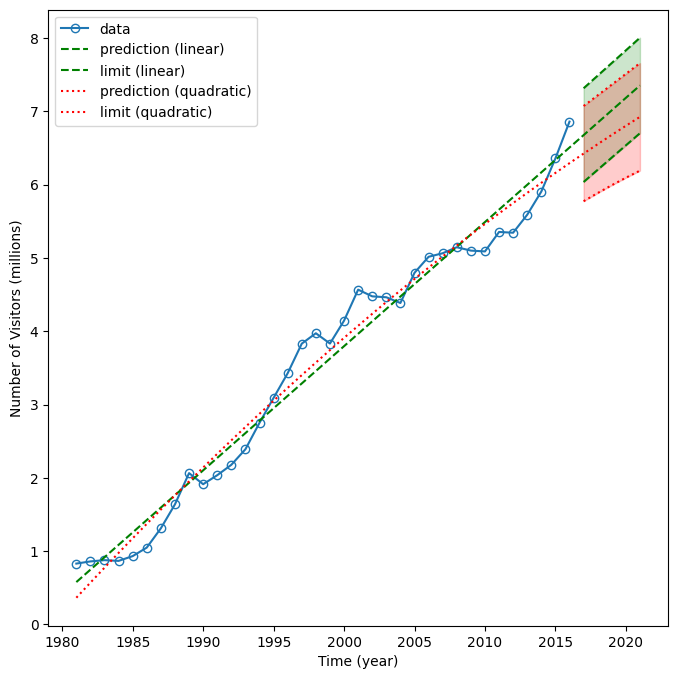

In [26]:
pred_df_quad = pd.DataFrame(pred_data_quad)
pred_df_quad.index = pd.date_range(start_date, periods=future[-1], freq='Y')

# Combine with quadratic model predictions
fitted_val_quad = b0_quad + b1_quad * df['time'] + b2_quad * df['time_squared']
vals_quad = pd.concat([fitted_val_quad, pred_df_quad['pred']])

# Plot data and linear and quadratic model predictions
fig = plt.figure(figsize=(8, 8))
fig.set_facecolor('white')
marker_config = dict()
marker_config['marker'] = 'o'
marker_config['markerfacecolor'] = 'none'
plt.plot(df['visitors'], label='data', **marker_config)
plt.plot(vals, color='green',label='prediction (linear)', linestyle='--')
plt.plot(pred_df['ll'], color='green', linestyle='--', label='limit (linear)')
plt.plot(pred_df['ul'], color='green', linestyle='--')
plt.plot(vals_quad, color='red' ,label='prediction (quadratic)', linestyle=':')
plt.plot(pred_df_quad['ll'], color='red', linestyle=':', label='limit (quadratic)')
plt.plot(pred_df_quad['ul'], color='red', linestyle=':')
plt.fill_between(pred_df.index, pred_df['ll'], pred_df['ul'], alpha=0.2, color='green')
plt.fill_between(pred_df_quad.index, pred_df_quad['ll'], pred_df_quad['ul'], alpha=0.2, color='red')
plt.legend(loc='upper left')
plt.ylabel('Number of Visitors (millions)')
plt.xlabel('Time (year)')
plt.show()

## Model Estimation

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# MAE / MSE 계산 및 비교
mae_linear = mean_absolute_error(df['visitors'], fitted_val)
mse_linear = mean_squared_error(df['visitors'], fitted_val)
mae_quad = mean_absolute_error(df['visitors'], fitted_val_quad)
mse_quad = mean_squared_error(df['visitors'], fitted_val_quad)

print(f"MAE (Linear): {mae_linear}")
print(f"MSE (Linear): {mse_linear}")
print(f"MAE (Quadratic): {mae_quad}")
print(f"MSE (Quadratic): {mse_quad}")

MAE (Linear): 0.24867373445945942
MSE (Linear): 0.08374217795248323
MAE (Quadratic): 0.23321385154924487
MSE (Quadratic): 0.07299358976204334
